In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors


In [2]:
##Start code here
data =pd.read_csv('blobs.csv')
##End code

In [3]:

X = data[['feature1', 'feature2']].values
y = data['class'].values

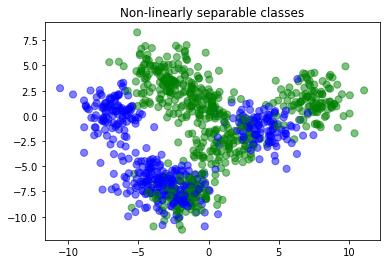

In [4]:

colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
_ = lr_model.fit(X, y)


/home/hindu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
def plot_decision_boundary( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()


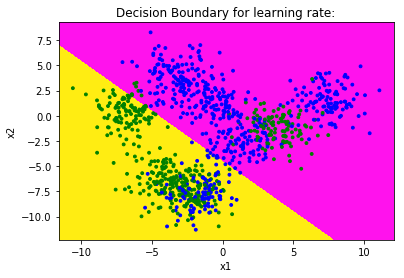

In [7]:

plot_decision_boundary(X.T,y,lambda x: lr_model.predict(x))


In [28]:

##Start code here
X_data = X.T
y_data = y.reshape(1,len(y))
##End code

In [30]:

##Start code here
layer_dims = [2,9,9,1]

##End code

In [31]:
##Start code here
import tensorflow as tf
##End code

In [32]:
def placeholders(num_features):
  ##Start code here
  A_0 = tf.placeholder(dtype=tf.float64,shape=([num_features,None]))
  Y = tf.placeholder(dtype=tf.float64,shape=([1,None]))
  return A_0,Y
  ##End code


In [33]:

def initialize_parameters_deep(layer_dims):
    L = len(layer_dims)
    parameters = {}
    for l in range(1, L):
        parameters['W' + str(l)] = tf.Variable(initial_value = tf.random_normal([layer_dims[l], \
                                                                                 layer_dims[l - 1]], dtype=tf.float64) * 0.01)
        parameters['b' + str(l)] = tf.Variable(initial_value = tf.zeros([layer_dims[l], 1], dtype=tf.float64) * 0.01)

    return parameters

In [34]:

def linear_forward_prop(A_prev,W,b, activation):
  Z = tf.add(tf.matmul(W,A_prev),b)
  if activation == "sigmoid":
    A = Z
  elif activation == "relu":
    A =  tf.nn.relu(Z)   #apply relu activation on Z using tf.nn.relu() function
  return A

In [35]:
def l_layer_forwardProp(A_0, parameters):
  A = A_0
  L = len(parameters)//2
  for l in range(1,L):
    A_prev = A
    A = linear_forward_prop(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu" )
  A_final = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )
  return A_final


In [36]:
def deep_layer_network(X_data, y_data, layer_dims, learning_rate, num_iter):
    num_features = layer_dims[0]
    A_0, Y = placeholders(num_features)  # call placeholder function to initialize placeholders A_0 and Y
    parameters = initialize_parameters_deep( layer_dims)
    # Initialse Weights and bias using initialize_parameters_deep() with layer_dims as parameters
    Z_final = l_layer_forwardProp(A_0, parameters)
    # call the function l_layer_forwardProp() to define the final output
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))
    # define the mean cost using sigmoid cross entropy function
    train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    # call tensorflow's gradient descent optimizer function with minimize cost
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        for i in range(num_iter):
            _, c = sess.run([train_net, cost], feed_dict={A_0: X_data, Y: y_data})
            if i % 1000 == 0:
                print(c)
        with open("Output.txt", "w") as text_file:
            text_file.write("c= %f\n" % c)
        params = sess.run(parameters)
    return params


In [37]:

parameters = deep_layer_network(X_data,y_data, layer_dims, 0.3, 10000)    #fill the parameters

0.6931501595086095
0.3059256819261242
0.29138143168006125
0.2877416989330029
0.28022248634739605
0.27744431674745756
0.27625426387143615
0.2779238529306195
0.2748990704332128
0.27476619583134176


In [38]:
def predict(A_0, parameters):
  with tf.Session() as sess:
    Z = l_layer_forwardProp(A_0, parameters)
    A = sess.run(tf.round(tf.sigmoid(Z)))
  return A


In [ ]:

plot_decision_boundary(X_data,y,lambda x: predict(x.T,parameters))